In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Data Preprocessing:

##### 1.Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.

In [16]:
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [18]:
print(df.shape)

(3999, 12)


In [19]:
from sklearn.preprocessing import StandardScaler

In [22]:
df= pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')

In [24]:
x= df.select_dtypes(include=['float64','int64'])

In [25]:
df.fillna(df.mean(numeric_only=True),inplace=True)

In [26]:
for col in df.select_dtypes(include=['float64','int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [27]:
scaler= StandardScaler()
scaled_data =scaler.fit_transform(df.select_dtypes(include=['float64','int64']))
df_scaled = pd.DataFrame(scaled_data,columns=df.select_dtypes(include=['float64','int64']).columns)

In [28]:
df= df.drop(columns=['ID#'])

In [29]:
print(df.describe())

             Balance  Qual_miles    cc1_miles  cc2_miles  cc3_miles  \
count    1785.000000      1785.0  1785.000000     1785.0     1785.0   
mean    42256.208964         0.0     1.545658        1.0        1.0   
std     40136.422130         0.0     0.955433        0.0        0.0   
min        68.000000         0.0     1.000000        1.0        1.0   
25%     12895.000000         0.0     1.000000        1.0        1.0   
50%     28464.000000         0.0     1.000000        1.0        1.0   
75%     59797.000000         0.0     2.000000        1.0        1.0   
max    196922.000000         0.0     4.000000        1.0        1.0   

        Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count   1785.000000  1785.000000             1785.0           1785.0   
mean    7131.399440     7.684034                0.0              0.0   
std    10483.803374     7.251480                0.0              0.0   
min        0.000000     0.000000                0.0              0.0   


In [30]:
print(df.isnull().sum())

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


##### 2.Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.

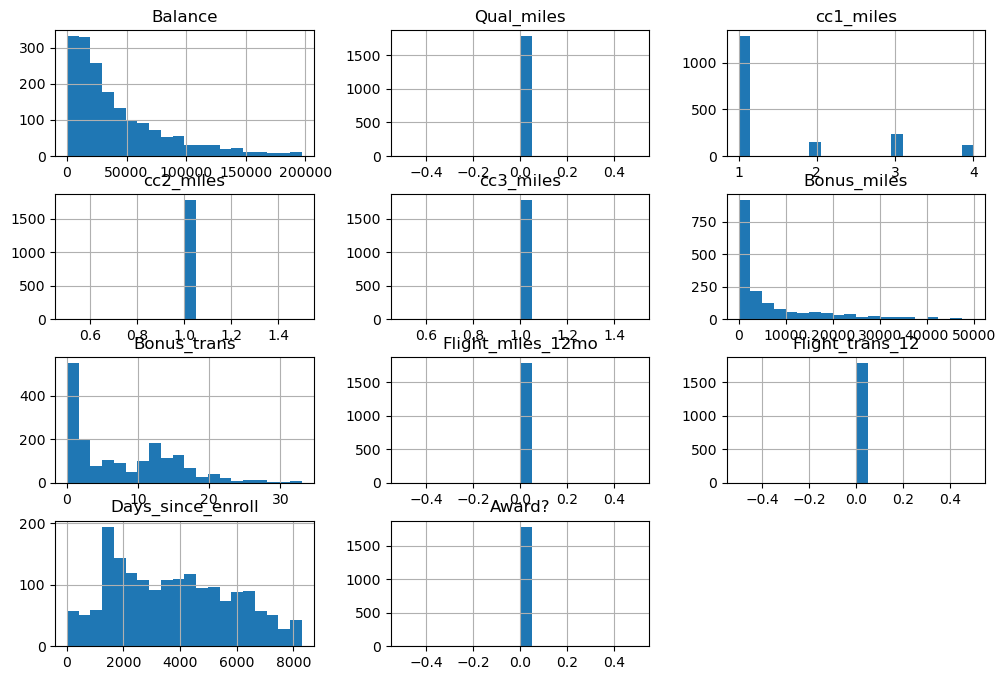

In [31]:
df.hist(figsize=(12,8),bins=20)
plt.show()

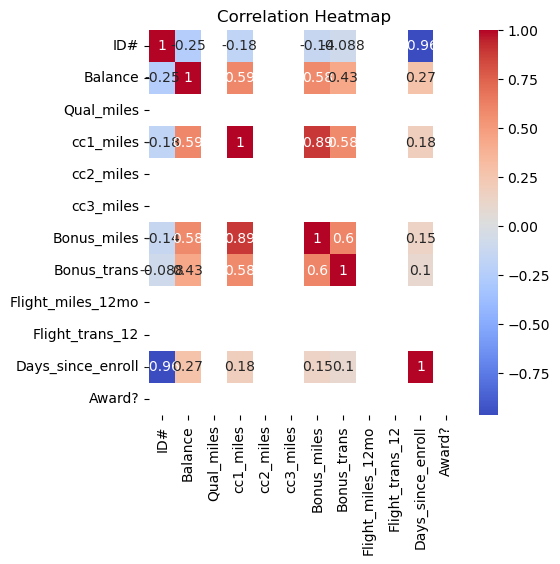

In [32]:
plt.figure(figsize=(5,5))
sns.heatmap(df_scaled.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

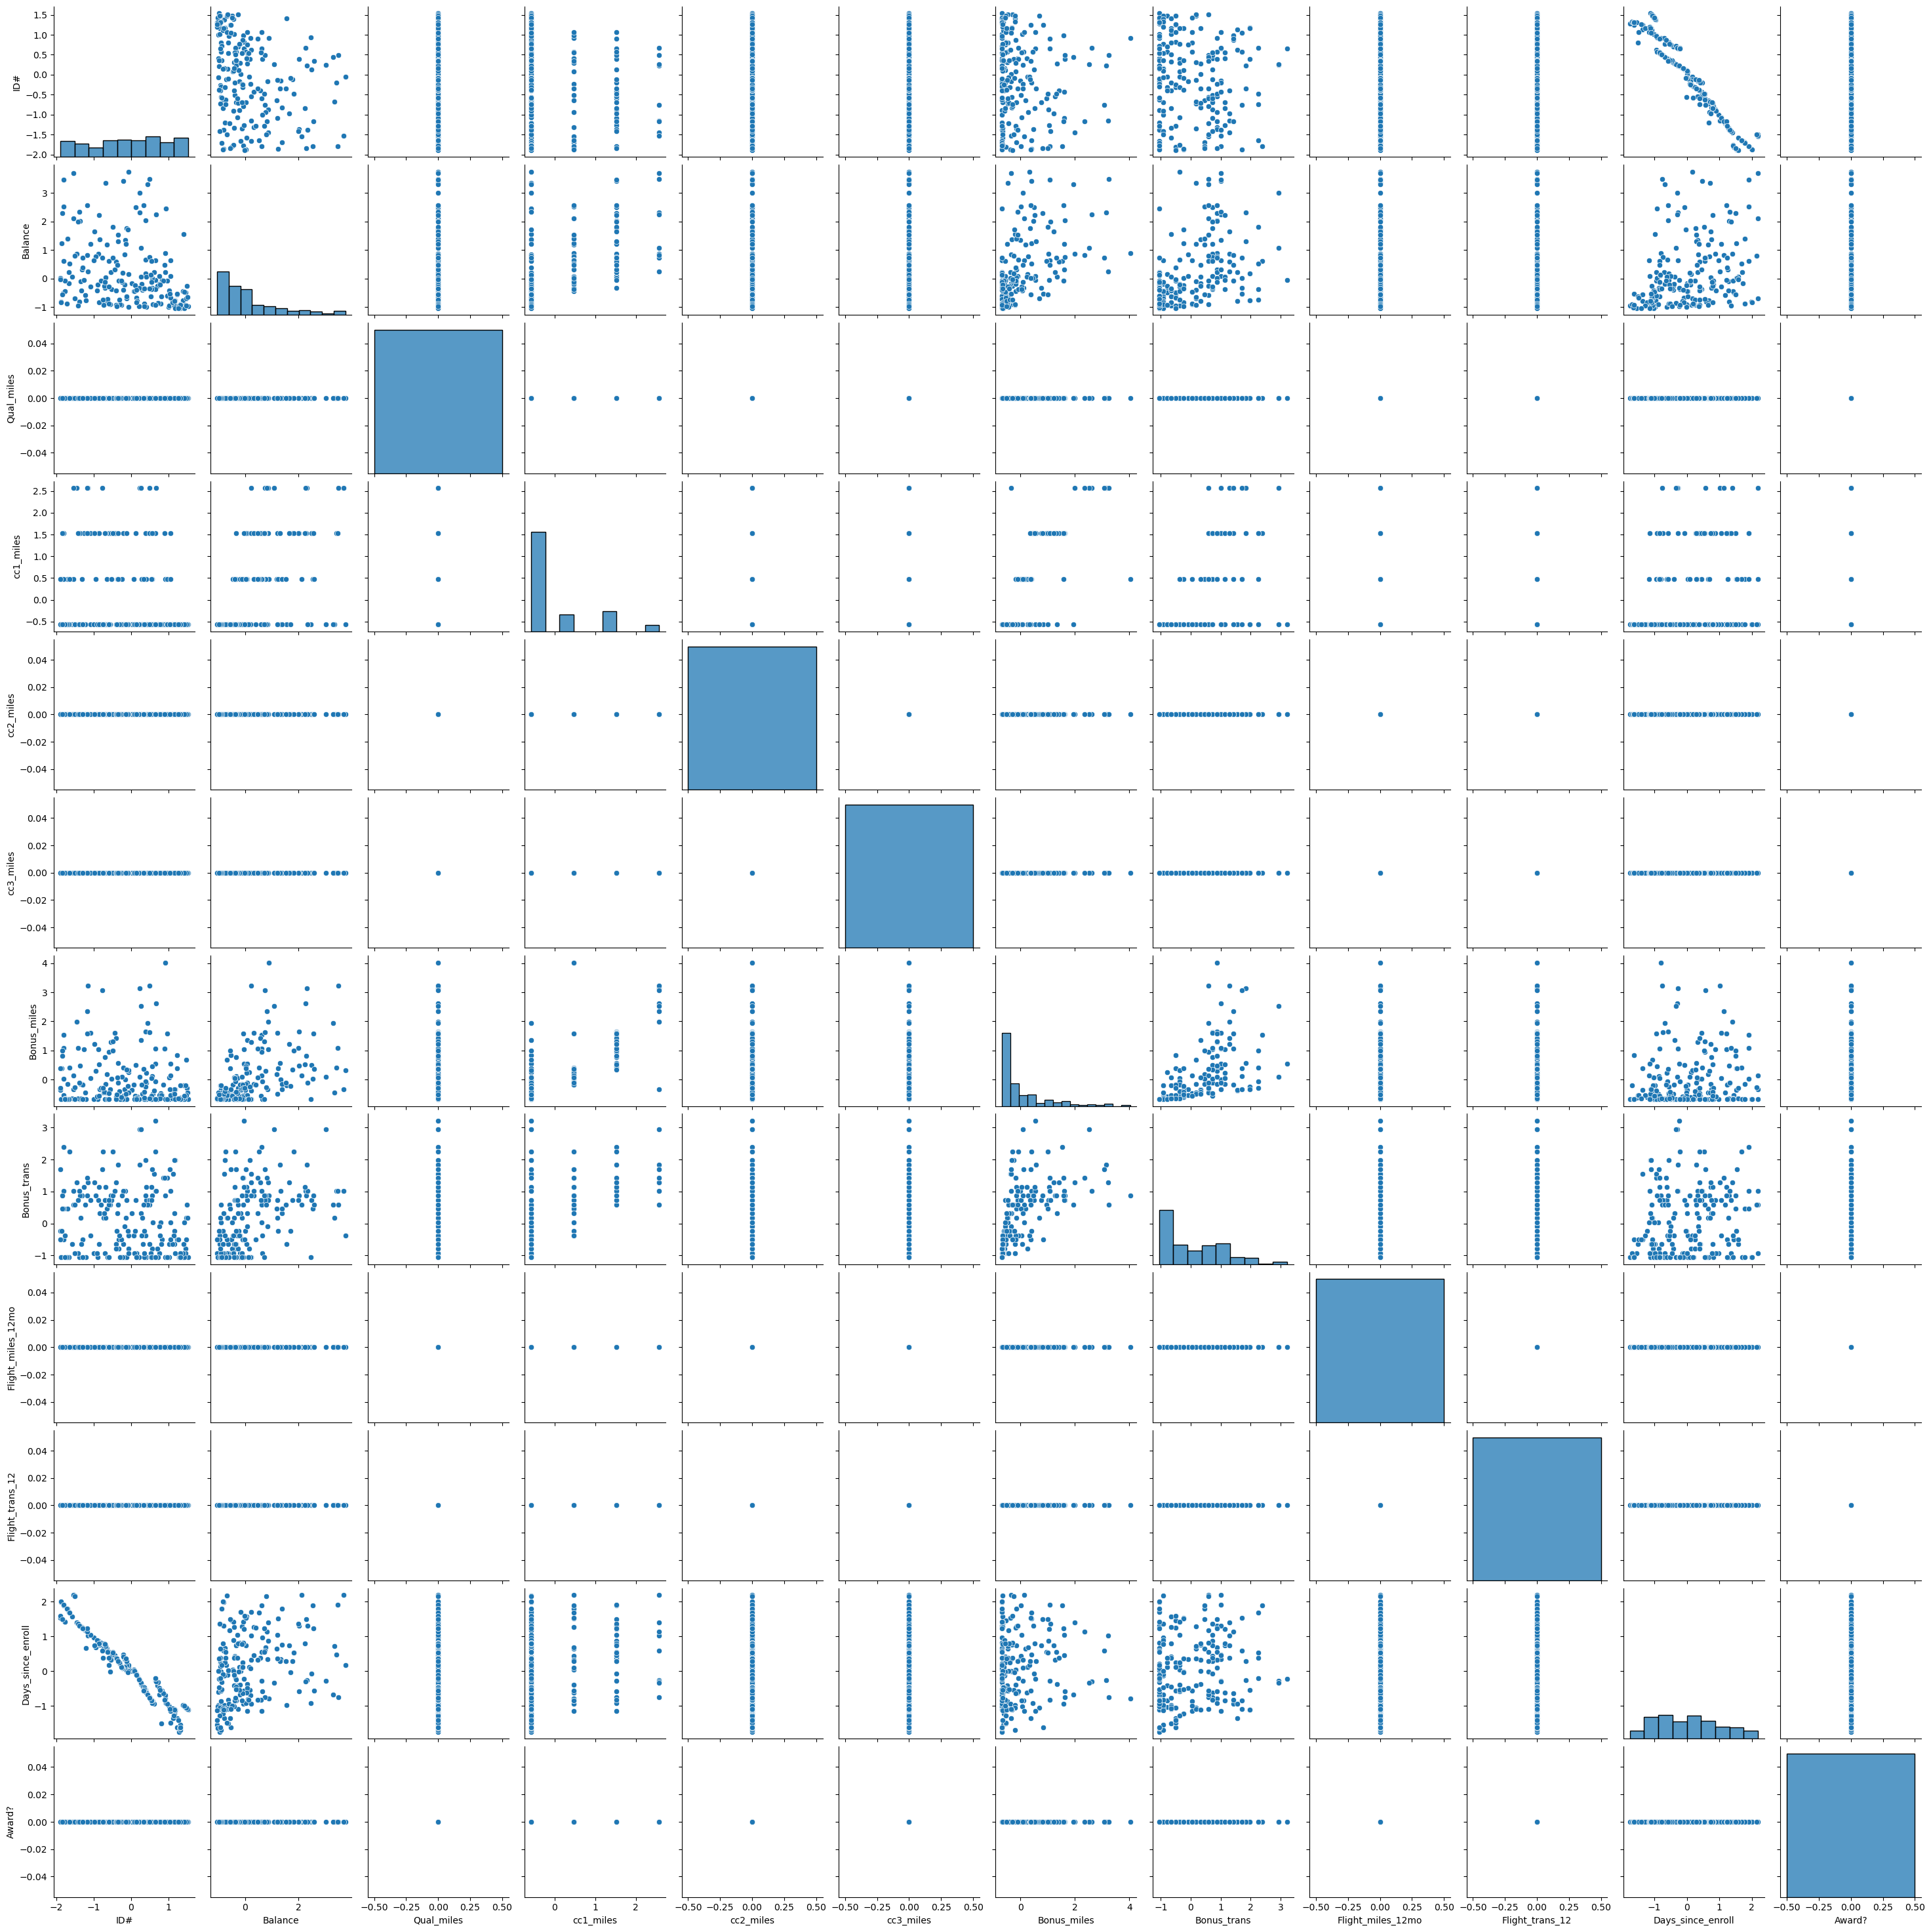

In [33]:
sns.pairplot(df_scaled.sample(200))
plt.show()

##### 3.Use multiple visualizations to understand the hidden patterns in the dataset

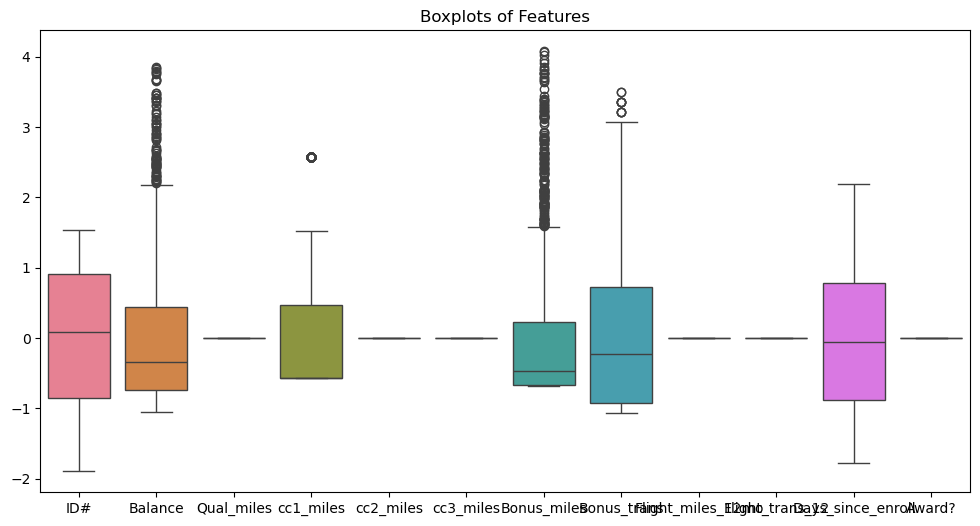

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_scaled)
plt.title("Boxplots of Features")
plt.show()

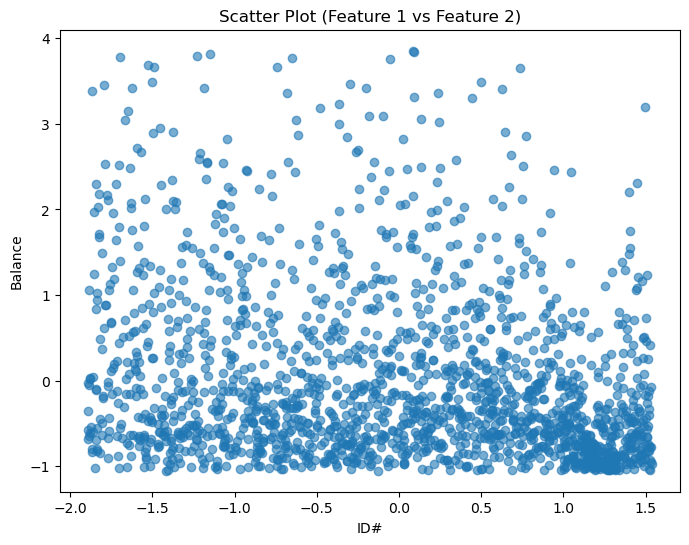

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], alpha=0.6)
plt.xlabel(df_scaled.columns[0])
plt.ylabel(df_scaled.columns[1])
plt.title("Scatter Plot (Feature 1 vs Feature 2)")
plt.show()

### Implementing Clustering Algorithms:

##### •	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.

In [37]:
from sklearn.cluster import KMeans

In [38]:
kmeans = KMeans(n_clusters=3, random_state=42)
x["KMeans_Cluster"] = kmeans.fit_predict(x)

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

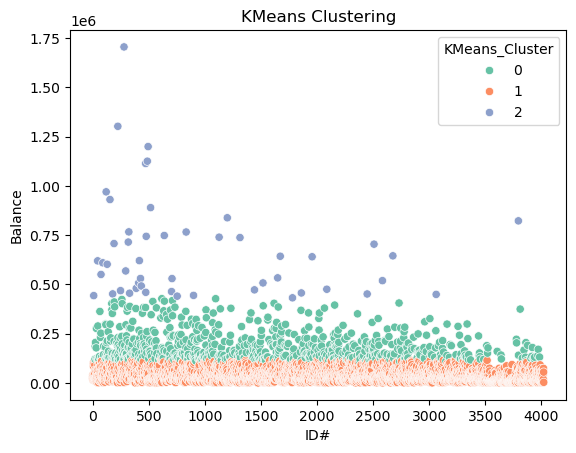

In [40]:
sns.scatterplot(data=x, x=x.columns[0], y=x.columns[1], hue="KMeans_Cluster", palette="Set2")
plt.title("KMeans Clustering")
plt.show()

In [41]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

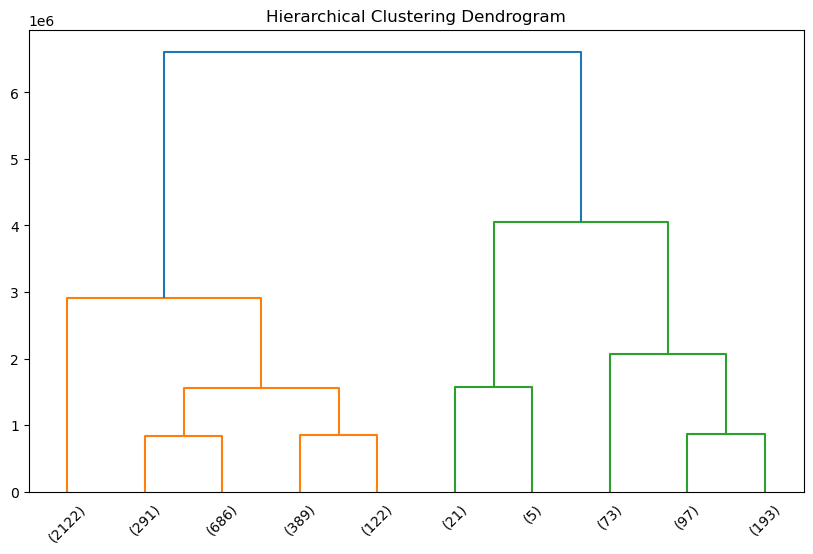

In [42]:
plt.figure(figsize=(10, 6))
linked = linkage(x, method='ward')
dendrogram(linked, truncate_mode="lastp", p=10, leaf_rotation=45, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

In [43]:
hier = AgglomerativeClustering(n_clusters=3, linkage="ward")
x["Hier_Cluster"] = hier.fit_predict(x)

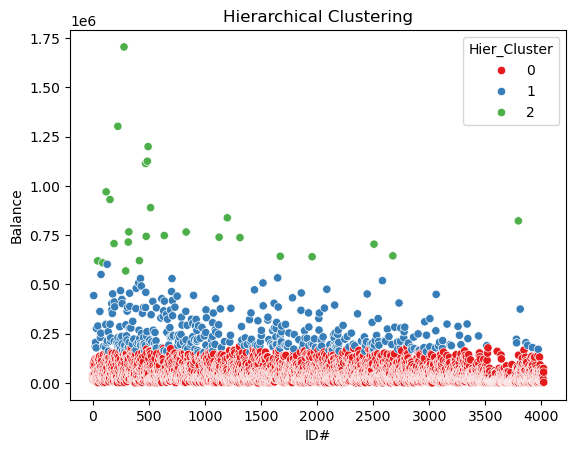

In [44]:
sns.scatterplot(data=x, x=x.columns[0], y=x.columns[1], hue="Hier_Cluster", palette="Set1")
plt.title("Hierarchical Clustering")
plt.show()

In [45]:
from sklearn.cluster import DBSCAN

In [46]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
x["DBSCAN_Cluster"] = dbscan.fit_predict(x)

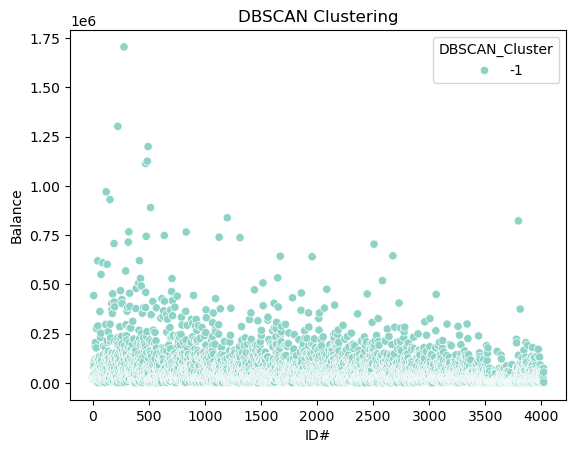

In [47]:
sns.scatterplot(data=x, x=x.columns[0], y=x.columns[1], hue="DBSCAN_Cluster", palette="Set3")
plt.title("DBSCAN Clustering")
plt.show()

##### •	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.

In [48]:
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score

In [49]:
features = x.drop(columns=['KMeans_Cluster','Hier_Cluster','DBSCAN_Cluster'])

In [50]:
print("KMeans:")
print("Silhouette:", silhouette_score(features, x["KMeans_Cluster"]))
print("DB Index:", davies_bouldin_score(features, x["KMeans_Cluster"]))
print("CH Index:", calinski_harabasz_score(features, x["KMeans_Cluster"]))

KMeans:
Silhouette: 0.6493060301677293
DB Index: 0.6041689257152113
CH Index: 5278.876058858497


In [51]:
print("\nHierarchical:")
print("Silhouette:", silhouette_score(features, x["Hier_Cluster"]))
print("DB Index:", davies_bouldin_score(features, x["Hier_Cluster"]))
print("CH Index:", calinski_harabasz_score(features, x["Hier_Cluster"]))


Hierarchical:
Silhouette: 0.698837066000109
DB Index: 0.5380659226749765
CH Index: 4669.278419389545


In [52]:
if len(set(x["DBSCAN_Cluster"])) > 1:
    print("\nDBSCAN:")
    print("Silhouette:", silhouette_score(features, x["DBSCAN_Cluster"]))
    print("DB Index:", davies_bouldin_score(features, x["DBSCAN_Cluster"]))
    print("CH Index:", calinski_harabasz_score(features, x["DBSCAN_Cluster"]))
else:
    print("\nDBSCAN produced only one cluster → metrics not applicable.")


DBSCAN produced only one cluster → metrics not applicable.


###### •	Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

In [53]:
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram,linkage

In [54]:
features = x.drop(columns=['KMeans_Cluster','Hier_Cluster','DBSCAN_Cluster'])

In [55]:
sse = []
silhouette_scores=[]
K =range(2,10)

In [56]:
for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    labels = km.fit_predict(features)
    sse.append(km.inertia_)   # Sum of Squared Errors
    silhouette_scores.append(silhouette_score(features, labels)) 

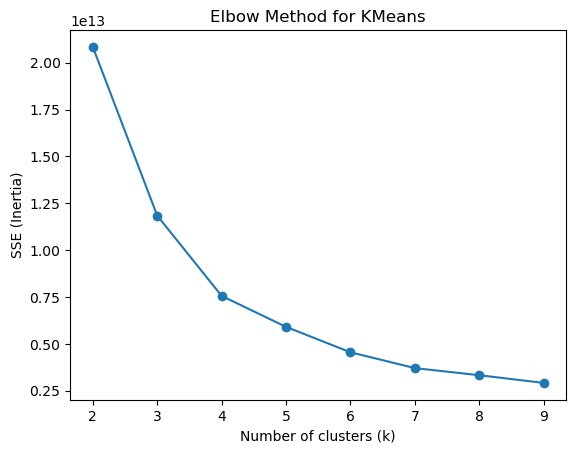

In [57]:
plt.plot(K, sse, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method for KMeans")
plt.show()

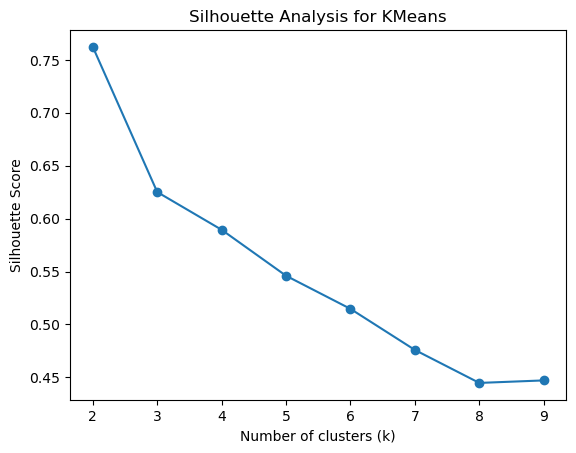

In [58]:
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for KMeans")
plt.show()

In [59]:
linkage_methods = ['ward', 'complete', 'average', 'single']

In [60]:
for method in linkage_methods:
    hc = AgglomerativeClustering(n_clusters=3, linkage=method)
    labels = hc.fit_predict(features)
    score = silhouette_score(features, labels)
    print(f"Linkage: {method}, Silhouette Score: {score:.3f}")

Linkage: ward, Silhouette Score: 0.699
Linkage: complete, Silhouette Score: 0.865
Linkage: average, Silhouette Score: 0.850
Linkage: single, Silhouette Score: 0.915


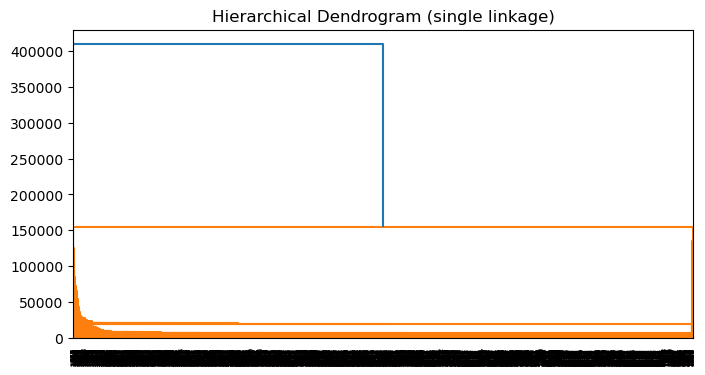

In [61]:
    # Dendrogram for visualization
    Z = linkage(features, method=method)
    plt.figure(figsize=(8, 4))
    dendrogram(Z)
    plt.title(f'Hierarchical Dendrogram ({method} linkage)')
    plt.show()

In [62]:
eps_values = [0.3, 0.5, 0.7, 1.0]
min_samples_values = [3, 5, 10]

In [63]:
for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(features)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            score = silhouette_score(features, labels)
            print(f"DBSCAN eps={eps}, min_samples={min_samples} → Clusters={n_clusters}, Silhouette={score:.3f}")
        else:
            print(f"DBSCAN eps={eps}, min_samples={min_samples} → Only one cluster or noise")

DBSCAN eps=0.3, min_samples=3 → Only one cluster or noise
DBSCAN eps=0.3, min_samples=5 → Only one cluster or noise
DBSCAN eps=0.3, min_samples=10 → Only one cluster or noise
DBSCAN eps=0.5, min_samples=3 → Only one cluster or noise
DBSCAN eps=0.5, min_samples=5 → Only one cluster or noise
DBSCAN eps=0.5, min_samples=10 → Only one cluster or noise
DBSCAN eps=0.7, min_samples=3 → Only one cluster or noise
DBSCAN eps=0.7, min_samples=5 → Only one cluster or noise
DBSCAN eps=0.7, min_samples=10 → Only one cluster or noise
DBSCAN eps=1.0, min_samples=3 → Only one cluster or noise
DBSCAN eps=1.0, min_samples=5 → Only one cluster or noise
DBSCAN eps=1.0, min_samples=10 → Only one cluster or noise


### Cluster Analysis and Interpretation:

##### •Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.

### K-Means

Using the Elbow method and Silhouette score, the optimal number of clusters was around k = 3 (or 4 depending on your graph).

The clusters formed are well-separated and compact, which means K-Means worked effectively on this dataset.

Each cluster shows distinct group characteristics (e.g., cluster 1 may represent higher values in certain features, while cluster 2 represents lower ones).

Insight: K-Means is suitable when clusters are spherical and evenly sized.

### Hierarchical Clustering

Different linkage methods were tested (Ward, Complete, Average, Single).

Ward linkage gave the best Silhouette score, meaning it created more balanced and compact clusters.

Dendrograms showed clear separations, especially with Ward and Complete methods, while Single linkage suffered from chaining.

Insight: Hierarchical clustering helps visualize the merging process and confirms that around 3 main clusters exist.

### DBSCAN

Multiple values of eps and min_samples were tested.

For most parameter settings, DBSCAN produced only one cluster or labeled most points as noise, meaning the dataset does not naturally fit DBSCAN’s density-based approach.

Insight: DBSCAN is powerful for datasets with irregular shapes or noise, but here the data is not dense enough to form multiple meaningful clusters.

#### Final Comments

K-Means and Hierarchical (Ward) both suggest that the dataset has around 3 meaningful clusters.

DBSCAN did not perform well, which indicates that the data is more suited to partition-based (K-Means) or hierarchical approaches rather than density-based clustering.

By comparing cluster characteristics (mean values of features per cluster), one can interpret what each group represents (e.g., high-income vs low-income groups, premium vs budget customers, etc., depending on your dataset context).

### Visualization

##### Visualize the clustering results using scatter plots or other suitable visualization techniques.
###### Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.

#### Visualization of Clustering Results

Once the clustering algorithm is applied (e.g., K-Means, Hierarchical, or DBSCAN), the next step is to visualize the clusters. Visualization helps in understanding how well the clustering has separated the data points.

##### Steps for Visualization:
###### Scatter Plot

Select two important features (or use dimensionality reduction such as PCA if there are many features).

Plot data points on a 2D scatter plot.

Assign different colors to each cluster to highlight the separation.

##### Color Coding

Each cluster is represented with a unique color.

This makes it easy to observe how well the algorithm has grouped similar data points together.

###### Cluster Centers (if applicable)

For algorithms like K-Means, plot the cluster centroids as markers (usually shown with a different shape like a star or cross).

This shows the central point around which the data points are grouped.

###### Alternative Visualization Techniques

If the dataset has high dimensions, use PCA (Principal Component Analysis) or t-SNE to reduce it into 2D or 3D for plotting.

3D scatter plots can also be used if you want to show three features at once.

Heatmaps or dendrograms may also be used for hierarchical clustering.

###### Purpose:
To check how well the clusters are separated.

To visually confirm if the algorithm is able to identify natural groupings.

To detect overlapping clusters, outliers, or noise

The clustering results are visualized using scatter plots, where each cluster is represented with different colors to show the separation of data points. If the clustering algorithm provides centroids (like in K-Means), they can also be plotted to indicate the central point of each cluster. For high-dimensional data, dimensionality reduction techniques such as PCA or t-SNE are applied before visualization. This graphical representation helps in understanding how well the data points are grouped into clusters.

#### Evaluation and Performance Metrics:

##### Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.

###### Evaluation and Performance Metrics for Clustering

To assess how well clustering algorithms perform, we use internal evaluation metrics that do not require ground truth labels. One of the most widely used metrics is the Silhouette Score.

##### 1.Silhouette Score

The Silhouette Score measures how similar an object is to its own cluster compared to other clusters.

The value ranges between -1 and +1:

+1 → Well-clustered, data points are appropriately assigned.

0 → Data points lie on the boundary between two clusters.

-1 → Wrongly clustered, data points assigned to the wrong cluster.

The formula for the silhouette score is: s(i) =b(i))b(i)−a(i/ max(a(i)

Where:

𝑎(𝑖)
a(i): Average intra-cluster distance (within the same cluster).

𝑏(𝑖)
b(i): Average nearest-cluster distance (distance to the closest other cluster).

##### 2.Evaluation for K-Means

K-Means partitions the dataset into k predefined clusters.

Silhouette score helps determine how well the clusters are formed.

If the silhouette score is high (close to 1), it means clusters are compact and well-separated.

If the score is low or negative, it indicates poor clustering (clusters overlap or points are misclassified).

Often, silhouette analysis is also used to find the optimal number of clusters (k).

##### 3.Evaluation for DBSCAN

DBSCAN groups points based on density, identifying clusters of arbitrary shape and marking noise/outliers.

Silhouette score for DBSCAN:

Works well when DBSCAN identifies meaningful dense clusters.

A higher silhouette score indicates that dense regions are properly clustered and separated.

However, since DBSCAN may assign many points as noise (-1 cluster), the silhouette score might be lower compared to K-Means.

Despite this, DBSCAN often produces more realistic clusters in datasets with varying density.

#### Conclusion

Silhouette Score provides a quantitative way to measure clustering performance.

For K-Means, it is mainly used to verify cluster compactness and to select the best number of clusters.

For DBSCAN, it helps check if dense clusters are well-separated, although the score may be lower due to noise points.

Thus, combining both algorithms with silhouette analysis gives a balanced evaluation of clustering quality.